<a href="https://colab.research.google.com/github/pab10dm/pab10dm/blob/main/clase05linealizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se requiere verificar el correcto desempeño de la linealización mediante la simulación numérica hecha mediante Euler.lineaizacion porque no aparece los sen o cos

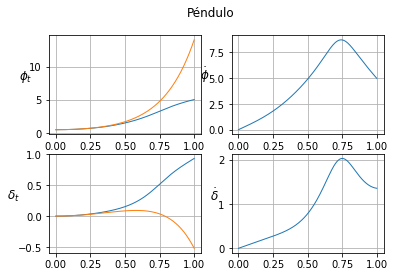

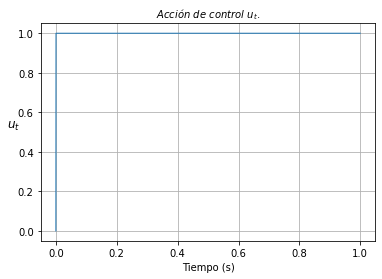

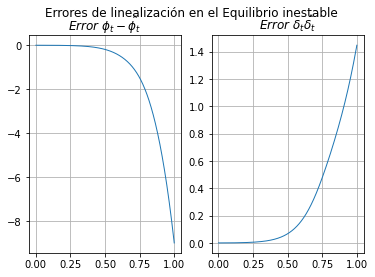

In [10]:
import numpy as np
import scipy as sp
import scipy.signal
from matplotlib import pyplot as plt
from pylab import *
from numpy.linalg import eig
m=.1;Fricc=0.1; long=.6;g=9.8;M=.5;
##%Versión linealizada en el equilibrio inestable. Sontag Pp 104.
##%            estado=[p(i); p_p(i); fi(i); omega(i)]
##Mat_A=[0 1 0 0;0 -Fricc/M -m*g/M 0; 0 0 0 1; 0 Fricc/(long*M) g*(m+M)/(long*M) 0];
##Mat_B=[0; 1/M; 0; -1/(long*M)];1
##Mat_C=[1 0 0 0]; %La salida es posición
h=1e-4;t_simul=1; #Tiene que ser muy pequeño para que se vea que coinciden
Mat_A=np.array([[0. ,1. ,0. ,0.],[0.,-Fricc/M, -m*g/M,0.],[0., 0. ,0. ,1.],[0.,Fricc/(long*M) ,g*(m+M)/(long*M), 0.]])
Mat_B=np.array([[0.],[1/M],[0.],[-1./(long*M)]])
Mat_C=np.array([[1., 0., 0., 0.]])
fi=np.linspace(0,0,int(t_simul/h))
omega=np.linspace(0,0,int(t_simul/h))
p_p=np.linspace(0,0,int(t_simul/h))
u=np.linspace(0,0,int(t_simul/h))
p=np.linspace(0,0,int(t_simul/h))
y=np.linspace(0,0,int(t_simul/h))
y_o=np.linspace(0,0,int(t_simul/h))
p_O=np.linspace(0,0,int(t_simul/h))
fi_O=np.linspace(0,0,int(t_simul/h))
t=np.linspace(0,0,int(t_simul/h))
##fi(1)=.1; color='r';
##fi(1)=.2; color='g';
##fi(1)=.7; color='b';
fi[0]=.5
fi_O[0]=fi[0]
fi_pp=0.
u[0]=0.
estado=[[p[0]], [p_p[0]], [fi[0]], [omega[0]]]
x_hat=estado #Igual condiciones inicial es del sistema lineal
for ii in range(int(t_simul/h)-1):
    y[ii]=np.matmul(Mat_C,estado)    
    u[ii+1]=1.
    p_pp=(1/(M+m))*(u[ii]-m*long*fi_pp*cos(fi[ii])+(m*long*omega[ii]**2)*sin(fi[ii])-Fricc*p_p[ii])
    fi_pp=(1/long)*(g*sin(fi[ii])-p_pp*cos(fi[ii]))    
    y_o[ii]=np.matmul(Mat_C,x_hat)
    x_hatp = np.matmul(Mat_A,x_hat) + Mat_B*u[ii]     
    x_hat = x_hat + h*x_hatp;    
    p_p[ii+1]  =p_p[ii]+h*p_pp;
    p[ii+1]    =p[ii]+h*p_p[ii];
    omega[ii+1]=omega[ii]+h*fi_pp;
    fi[ii+1]   =fi[ii]+h*omega[ii];
    t[ii] = ii*h
    estado=[[p[ii+1]], [p_p[ii+1]], [fi[ii+1]], [omega[ii+1]]]
    p_O[ii+1]=x_hat[0] #El vector inicia en 0, en Octave en 1
    fi_O[ii+1]=x_hat[2]
t[ii+1] = ii*h
u[ii+1]=1.
fig, axs = plt.subplots(2,2)
fig.suptitle('Péndulo')
axs[0,0].plot(t, fi, linewidth =1.0)
axs[0,0].plot(t, fi_O, linewidth =1.0)
axs[0,0].grid( True )
axs[0,0].set_ylabel('$\phi_t$',rotation=0, fontsize=12) 
axs[0,1].plot(t, omega, linewidth =1.0)
axs[0,1].set_ylabel('$\dot{\phi}$',rotation=0, fontsize=12)
axs[0,1].grid( True )

axs[1,0].plot(t[:-1], p[:-1], linewidth =1.0)
axs[1,0].plot(t, p_O, linewidth =1.0)
axs[1,0].grid( True )
axs[1,0].set_ylabel('$\delta_t$',rotation=0, fontsize=12) 
axs[1,1].plot(t, p_p, linewidth =1.0)
axs[1,1].set_ylabel('$\dot{\delta}$',rotation=0, fontsize=12)
axs[1,1].grid( True )
#Acción de control
fig, ax1 = plt.subplots()
plt.plot(t, u, linewidth =1.0)
plt.grid( True )
ax1.set_ylabel('$u_t$',rotation=0, fontsize=12) 
ax1.set_xlabel('Tiempo (s)')
#ax1.set_title(r'$\ddot{o}\acute{e}\grave{e}\hat{O}'
#             r'\breve{i}\bar{A}\tilde{n}\vec{q}$', fontsize=20)
ax1.set_title('$Acción\ de\ control\ u_t.$', fontsize=10)

fig2, axs2 = plt.subplots(1,2)
fig2.suptitle('Errores de linealización en el Equilibrio inestable')
axs2[0].plot(t, fi-fi_O, linewidth =1.0)
axs2[0].grid( True )
axs2[0].set_title('$Error\ \phi_t-\hat{\phi_t}$',rotation=0, fontsize=12) 
axs2[1].plot(t, p-p_O, linewidth =1.0)
axs2[1].set_title('$Error\ \delta_t\hat{\delta_t}$',rotation=0, fontsize=12)
axs2[1].grid( True )

por lo visto para valores pequeños de tiempo de simulacion se puede apreciar mejor la curvas de linealizacion. lineaizacion porque no aparece los sen o cos